In [289]:
import numpy as np
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [188]:
df= pd.read_csv('centroids.csv', names= ['frame', 'x', 'y'])

In [3]:
df.head()

,frame,x,y
0,0,268.851064,179.765957
1,1,268.851064,179.765957
2,2,268.851064,179.765957
3,3,268.851064,179.765957
4,4,268.851064,179.765957


In [21]:
df.min()

frame      0.000000
x        185.612903
y          6.823569
dtype: float64

In [22]:
df.max()

frame    8999.000000
x         591.568757
y         348.800000
dtype: float64

In [275]:
zones_dict = {'F1': [(105.99464167618511, 7.1765355722491222), (257.98873177198408, 7.1765355722492359), (262.15458840061149, 164.43762330293291), (109.2304463102077, 167.81285903667697)], 'F2': [(283.44167034909412, 7.1765355722492359), (438.8164044435768, 7.1765355722491222), (442.38113124171457, 160.4597878921785), (288.11892470387863, 163.86455645752972)], 'F3': [(288.8517175727705, 188.41311756540691), (442.94675209898367, 184.78148475475029), (446.67252074288427, 344.98953644248104), (293.62284577993813, 348.24591250552362)], 'F4': [(109.7304463102077, 192.63455589924877), (262.805961309206, 189.02695060237627), (267.03866548828989, 348.81153336279272), (112.94246724620933, 352.09017587858216)], 'CL': [(109.2304463102077, 167.81285903667697), (262.15458840061149, 164.43762330293291), (262.805961309206, 189.02695060237627), (109.7304463102077, 192.63455589924877)], 'M': [(262.15458840061149, 164.43762330293291), (288.11892470387863, 163.86455645752972), (288.8517175727705, 188.41311756540691), (262.805961309206, 189.02695060237627)], 'OB': [(262.805961309206, 189.02695060237627), (288.8517175727705, 188.41311756540691), (293.62284577993813, 348.24591250552362), (267.03866548828989, 348.81153336279272)], 'CR': [(288.11892470387863, 163.86455645752972), (442.38113124171457, 160.4597878921785), (442.94675209898367, 184.78148475475029), (288.8517175727705, 188.41311756540691)], 'OT': [(257.98873177198408, 7.1765355722492359), (283.44167034909412, 7.1765355722492359), (288.11892470387863, 163.86455645752972), (262.15458840061149, 164.43762330293291)]}

In [276]:
zones_dict['OT']
# format [(x_min, y_min), (x_max, y_max), (x_max, y_max), (x_min, y_min)]

[(257.9887317719841, 7.176535572249236),
 (283.4416703490941, 7.176535572249236),
 (288.11892470387863, 163.86455645752972),
 (262.1545884006115, 164.4376233029329)]

In [295]:
# df_new = calc_features(df[['frame', 'x', 'y']], zones_dict)

In [189]:
cl_xmin = np.min([zones_dict['CL'][0][0], zones_dict['CL'][3][0]])
cl_xmax = np.mean([zones_dict['CL'][1][0], zones_dict['CL'][2][0]])

cl_ymin = np.min([zones_dict['CL'][0][1], zones_dict['CL'][1][1]])
cl_ymax = np.max([zones_dict['CL'][2][1], zones_dict['CL'][3][1]])

cr_xmin = np.mean([zones_dict['CR'][0][0], zones_dict['CR'][3][0]])
cr_xmax = np.max([zones_dict['CR'][1][0], zones_dict['CR'][2][0]])

cr_ymin = np.min([zones_dict['CR'][0][1], zones_dict['CR'][1][1]]) #same as CL
cr_ymax = np.max([zones_dict['CR'][2][1], zones_dict['CR'][3][1]])

ob_xmin = np.min([zones_dict['OB'][0][0], zones_dict['OB'][3][0]])
ob_xmax = np.max([zones_dict['OB'][1][0], zones_dict['OB'][2][0]])

ob_ymin = np.min([zones_dict['OB'][0][1], zones_dict['OB'][1][1]])
ob_ymax = np.mean([zones_dict['OB'][2][1], zones_dict['OB'][3][1]])

ot_xmin = np.min([zones_dict['OT'][0][0], zones_dict['OT'][3][0]]) #same as OB
ot_xmax = np.max([zones_dict['OT'][1][0], zones_dict['OT'][2][0]])

ot_ymin = np.mean([zones_dict['OT'][0][1], zones_dict['OT'][1][1]])
ot_ymax = np.max([zones_dict['OT'][2][1], zones_dict['OT'][3][1]])

m_xmin = cl_xmax
m_xmax = cr_xmin
m_ymin = ob_ymax
m_ymax = ot_ymin


In [280]:
df['zone'] = np.where(((cl_xmin<= df['x']) & (df['x']<=cl_xmax) & (cl_ymin<= df['y']) & (df['y']<=cl_ymax)), 'CL',
                      np.where(((cr_xmin<= df['x']) & (df['x']<=cr_xmax) & (cr_ymin<= df['y']) & (df['y']<=cr_ymax)), 'CR', 
                               np.where(((ob_xmin<= df['x']) & (df['x']<=ob_xmax) & (ob_ymin<= df['y']) & (df['y']<=ob_ymax)), 'OB', 
                                        np.where(((ot_xmin<= df['x']) & (df['x']<=ot_xmax) & (ot_ymin<= df['y']) & (df['y']<=ot_ymax)), 'OT', 
                                                 np.where(((m_xmin<= df['x']) & (df['x']<=m_xmax) & (m_ymin<= df['y']) & (df['y']<=m_ymax)), 'M', np.nan))))) 


In [71]:
df['y'].min()

6.823568575233022

In [57]:
df['zone'].value_counts()

CL     6853
nan    1307
CR      606
OT      234
Name: zone, dtype: int64

In [75]:
cl_xmin, cl_xmax, cl_ymin, cl_ymax

(109.2304463102077, 262.48027485490877, 164.4376233029329, 192.63455589924877)

In [79]:
df['y'].min()

185.61290322580646

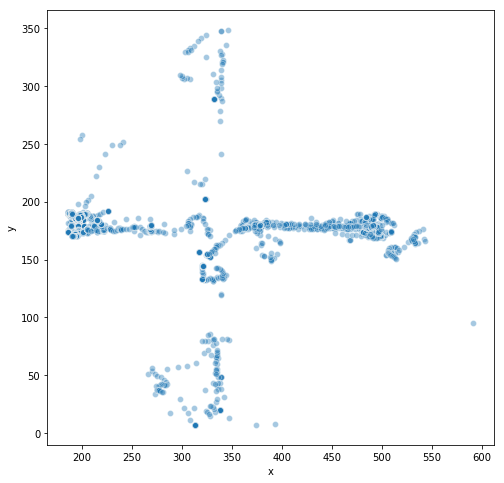

In [147]:
plt.figure(figsize= (8, 8))
sns.scatterplot(x=df.loc[:, 'x'], y=df.loc[:, 'y'], alpha= 0.4)
plt.show()

In [217]:
df[['x-1', 'y-1']] = df[['x', 'y']].shift(1)
df[['x-5', 'y-5']] = df[['x', 'y']].shift(5)
df[['x-10', 'y-10']] = df[['x', 'y']].shift(10)

In [269]:
frames = 30.0183
df['v_1'] = np.sqrt(np.square(df['x']- df['x-1'])+ np.square(df['y']- df['y-1']))*frames
df['v_5'] = np.sqrt(np.square(df['x']- df['x-5'])+ np.square(df['y']- df['y-5']))*(frames/5.0)
df['v_10'] = np.sqrt(np.square(df['x']- df['x-10'])+ np.square(df['y']- df['y-10']))*(frames/10.0)
df['dir'] = np.where(np.abs(df['x-1']-df['x']) > np.abs(df['y-1']-df['y']), 
                    np.where(df['x-1']>df['x'], 'l', 'r'), np.where(df['y-1']> df['y'], 'd', 'u'))
df['rest'] = np.where(df['v_1'] ==0, 1, 0)
df['safe'] = np.where((df['x'] < (cl_xmin+ 0.05*(cl_xmax-cl_xmin))) | (df['x'] > (cr_xmax - 0.05*(cl_xmax-cl_xmin))), 1, 0)

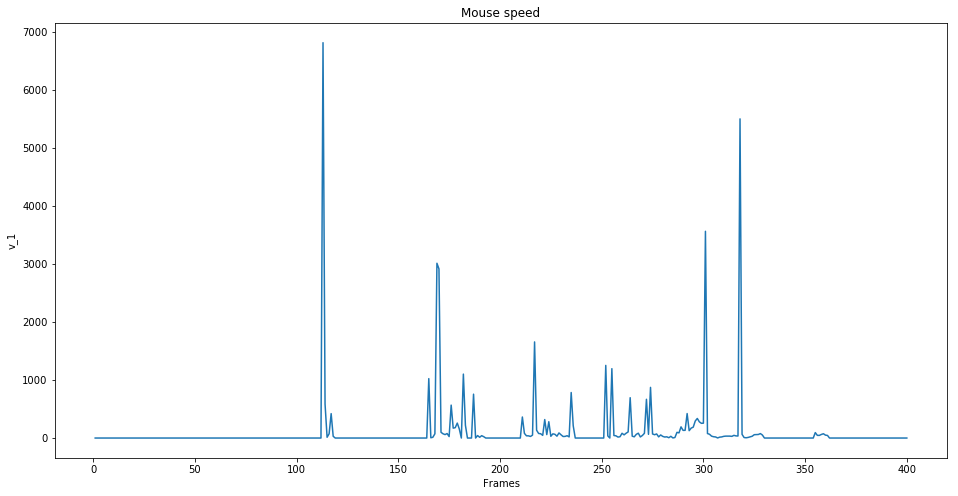

In [299]:
plt.figure(figsize= (16, 8))
plt.title("Mouse speed")
plt.xlabel("Frames")
plt.ylabel("Speed(pixels per second)")
sns.lineplot(x= np.arange(401),y=df.loc[:400, 'v_1'])
plt.show()

In [209]:
zones = ['CL', 'CR', 'OB', 'OT', 'M']
t = pd.DataFrame(np.zeros((1,5)), columns= zones)

In [248]:
for zone in zones:
    t.loc[:, zone] = (df['zone'] == zone).sum()*100.0/df['zone'].isin(zones).sum()

t['rest'] = np.sum(df['rest']==1)*100.0/df['zone'].isin(zones).sum()
t['safe'] = np.sum((df['rest']==1) & (df['safe']==1))*100.0/df['zone'].isin(zones).sum()

t['peek'] = np.sum((df['rest']==1) & (df['x'] < cr_xmax+ 0.05*(cr_xmax-cr_xmin)) &
                  (df['x'] > cl_xmax - 0.05*(cl_xmax-cl_xmin)) & (df['y'] > ob_ymax- 0.05*(ob_ymax-ob_ymin)) &
                   (df['y'] < ot_ymax+ 0.05*(ot_ymax-ot_ymin))
                  )*100.0/df['zone'].isin(zones).sum()

In [232]:
t['closed'] = t['CL'] + t['CR']
t['open'] = t['OB'] + t['OT'] + t['M']


In [245]:
p = pd.DataFrame(columns= zones)

In [246]:
for zone in zones:
    p.loc[:, zone] = (df.loc[df['zone'] == zone, 'x'].mean(), df.loc[df['zone'] == zone, 'y'].mean())

In [255]:
v = pd.DataFrame(np.zeros((1,5)), columns= zones)

In [ ]:
# for zone in zones:
#     for dir in ['l', 'r', 'u', 'd']:
        

In [270]:
for zone in zones:
    v.loc[:, zone] = df.loc[df['zone'] == zone, 'v_1'].mean()
v['CL-l'] = df.loc[(df['dir']=='l') & (df['zone'] == 'CL'),'v_1'].mean()
v['CL-r'] = df.loc[(df['dir']=='r') & (df['zone'] == 'CL'),'v_1'].mean()
v['CR-l'] = df.loc[(df['dir']=='l') & (df['zone'] == 'CR'),'v_1'].mean()
v['CR-r'] = df.loc[(df['dir']=='r') & (df['zone'] == 'CR'),'v_1'].mean()
v['OB-u'] = df.loc[(df['dir']=='u') & (df['zone'] == 'OB'),'v_1'].mean()
v['OB-d'] = df.loc[(df['dir']=='d') & (df['zone'] == 'OB'),'v_1'].mean()
v['OT-u'] = df.loc[(df['dir']=='u') & (df['zone'] == 'OT'),'v_1'].mean()
v['OT-d'] = df.loc[(df['dir']=='d') & (df['zone'] == 'OT'),'v_1'].mean()

In [298]:
df.head()

,frame,x,y,zone,x-1,y-1,x-5,y-5,x-10,y-10,v_1,v_5,v_10,rest,safe,dir
0,0,268.851064,179.765957,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,u
1,1,268.851064,179.765957,nan,268.851064,179.765957,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1,0,u
2,2,268.851064,179.765957,nan,268.851064,179.765957,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1,0,u
3,3,268.851064,179.765957,nan,268.851064,179.765957,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1,0,u
4,4,268.851064,179.765957,nan,268.851064,179.765957,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1,0,u


In [273]:
t

#ToDo
#sensitivity analysis: t-5? 5%? 
#Smoothing

,CL,CR,OB,OT,M,rest,safe,closed,open,peek
0,95.691102,3.86122,0.0,0.447678,0.0,103.245663,1.91662,99.552322,0.447678,0.0


In [267]:
p

,CL,CR,OB,OT,M
0,196.407189,379.375804,NaN,277.916450,NaN
1,183.715697,178.118657,NaN,41.368731,NaN


In [271]:
v

,CL,CR,OB,OT,M,CL-l,CL-r,CR-l,CR-r,OB-u,OB-d,OT-u,OT-d
0,7.458818,181.583652,NaN,198.863997,NaN,125.427646,45.343304,144.82741,135.021534,NaN,NaN,617.086223,60.179008


In [306]:
def basic_features(centroids, zones_dict):
    '''Calcultes the following features: Position, Speed, Direction, Safe, Rest
    Input: centroids output from code as a dataframe; zones_dict(coordinates of each arm)'''
    
    df = centroids
    
    # Get X and Y cooredinates of each zones and identify for each frame
    cl_xmin = np.min([zones_dict['CL'][0][0], zones_dict['CL'][3][0]])
    cl_xmax = np.mean([zones_dict['CL'][1][0], zones_dict['CL'][2][0]])

    cl_ymin = np.min([zones_dict['CL'][0][1], zones_dict['CL'][1][1]])
    cl_ymax = np.max([zones_dict['CL'][2][1], zones_dict['CL'][3][1]])

    cr_xmin = np.mean([zones_dict['CR'][0][0], zones_dict['CR'][3][0]])
    cr_xmax = np.max([zones_dict['CR'][1][0], zones_dict['CR'][2][0]])

    cr_ymin = np.min([zones_dict['CR'][0][1], zones_dict['CR'][1][1]]) #same as CL
    cr_ymax = np.max([zones_dict['CR'][2][1], zones_dict['CR'][3][1]])

    ob_xmin = np.min([zones_dict['OB'][0][0], zones_dict['OB'][3][0]])
    ob_xmax = np.max([zones_dict['OB'][1][0], zones_dict['OB'][2][0]])

    ob_ymin = np.min([zones_dict['OB'][0][1], zones_dict['OB'][1][1]])
    ob_ymax = np.mean([zones_dict['OB'][2][1], zones_dict['OB'][3][1]])

    ot_xmin = np.min([zones_dict['OT'][0][0], zones_dict['OT'][3][0]]) #same as OB
    ot_xmax = np.max([zones_dict['OT'][1][0], zones_dict['OT'][2][0]])

    ot_ymin = np.mean([zones_dict['OT'][0][1], zones_dict['OT'][1][1]])
    ot_ymax = np.max([zones_dict['OT'][2][1], zones_dict['OT'][3][1]])

    m_xmin = cl_xmax
    m_xmax = cr_xmin
    m_ymin = ob_ymax
    m_ymax = ot_ymin
    
    
    df['zone'] = np.where(((cl_xmin<= df['x']) & (df['x']<=cl_xmax) & (cl_ymin<= df['y']) & (df['y']<=cl_ymax)), 'CL',
                      np.where(((cr_xmin<= df['x']) & (df['x']<=cr_xmax) & (cr_ymin<= df['y']) & (df['y']<=cr_ymax)), 'CR', 
                               np.where(((ob_xmin<= df['x']) & (df['x']<=ob_xmax) & (ob_ymin<= df['y']) & (df['y']<=ob_ymax)), 'OB', 
                                        np.where(((ot_xmin<= df['x']) & (df['x']<=ot_xmax) & (ot_ymin<= df['y']) & (df['y']<=ot_ymax)), 'OT', 
                                                 np.where(((m_xmin<= df['x']) & (df['x']<=m_xmax) & (m_ymin<= df['y']) & (df['y']<=m_ymax)), 'M', np.nan))))) 
    
    # Finding movement based parameters
    
    df[['x-1', 'y-1']] = df[['x', 'y']].shift(1)
    df[['x-5', 'y-5']] = df[['x', 'y']].shift(5)
    df[['x-10', 'y-10']] = df[['x', 'y']].shift(10)
    
    frames = 30.0183 # number of frames per second
    
    #Finding velocities
    df['v_1']= np.sqrt(np.square(df['x']- df['x-1'])+ np.square(df['y']- df['y-1']))*frames
    df['v_5']= np.sqrt(np.square(df['x']- df['x-5'])+ np.square(df['y']- df['y-5']))*(frames/5.0)
    df['v_10']= np.sqrt(np.square(df['x']- df['x-10'])+ np.square(df['y']- df['y-10']))*(frames/10.0)
    
    #Other features
    
    safe_size = 0.05
    
    df['rest'] = np.where(df['v_1'] ==0, 1, 0)
    df['safe_rest'] = np.where((df['x'] < (cl_xmin+ safe_size*(cl_xmax-cl_xmin))) | (df['x'] > (cr_xmax - safe_size*(cl_xmax-cl_xmin))), 1, 0)
    df['safe_pos'] = np.where((df['x'] < (cl_xmin+ safe_size*(cl_xmax-cl_xmin))) | (df['x'] > (cr_xmax - safe_size*(cl_xmax-cl_xmin))), 1, 0)
    df['dir'] = np.where(np.abs(df['x-1']-df['x']) > np.abs(df['y-1']-df['y']), 
                    np.where(df['x-1']>df['x'], 'l', 'r'), np.where(df['y-1']> df['y'], 'd', 'u'))
    
    return df

In [323]:
def agg_features(df_basic):
    '''Input: df_basic output from basic_features function
    Output: t, p, v: dataframes with time, position & velocity aggregated features'''
    
    zones = ['CL', 'CR', 'OB', 'OT', 'M']
    t = pd.DataFrame(np.zeros((1,5)), columns= zones)
    v = pd.DataFrame(np.zeros((1,5)), columns= zones)
    p = pd.DataFrame(columns= zones)
    
    for zone in zones:
        t.loc[:, zone] = (df['zone'] == zone).sum()*100.0/df['zone'].isin(zones).sum()
        v.loc[:, zone] = df.loc[df['zone'] == zone, 'v_1'].mean()
        p.loc[:, zone] = (df.loc[df['zone'] == zone, 'x'].mean(), df.loc[df['zone'] == zone, 'y'].mean())

    t['rest'] = np.sum(df['rest']==1)*100.0/df['zone'].isin(zones).sum()
    t['safe'] = np.sum((df['rest']==1) & (df['safe']==1))*100.0/df['zone'].isin(zones).sum()
    t['peek'] = np.sum((df['rest']==1) & (df['x'] < cr_xmax+ 0.05*(cr_xmax-cr_xmin)) &
                      (df['x'] > cl_xmax - 0.05*(cl_xmax-cl_xmin)) & (df['y'] > ob_ymax- 0.05*(ob_ymax-ob_ymin)) &
                       (df['y'] < ot_ymax+ 0.05*(ot_ymax-ot_ymin))
                      )*100.0/df['zone'].isin(zones).sum()
    t['closed'] = t['CL'] + t['CR']
    t['open'] = t['OB'] + t['OT'] + t['M']
    
    v['CL-l'] = df.loc[(df['dir']=='l') & (df['zone'] == 'CL'),'v_1'].mean()
    v['CL-r'] = df.loc[(df['dir']=='r') & (df['zone'] == 'CL'),'v_1'].mean()
    v['CR-l'] = df.loc[(df['dir']=='l') & (df['zone'] == 'CR'),'v_1'].mean()
    v['CR-r'] = df.loc[(df['dir']=='r') & (df['zone'] == 'CR'),'v_1'].mean()
    v['OB-u'] = df.loc[(df['dir']=='u') & (df['zone'] == 'OB'),'v_1'].mean()
    v['OB-d'] = df.loc[(df['dir']=='d') & (df['zone'] == 'OB'),'v_1'].mean()
    v['OT-u'] = df.loc[(df['dir']=='u') & (df['zone'] == 'OT'),'v_1'].mean()
    v['OT-d'] = df.loc[(df['dir']=='d') & (df['zone'] == 'OT'),'v_1'].mean()
    
    return t, p, v


In [324]:
df_features = basic_features(df, zones_dict)

In [325]:
t, p ,v =  agg_features(df_features)

In [326]:
v

,CL,CR,OB,OT,M,CL-l,CL-r,CR-l,CR-r,OB-u,OB-d,OT-u,OT-d
0,7.458818,181.583652,NaN,198.863997,NaN,125.427646,45.343304,144.82741,135.021534,NaN,NaN,617.086223,60.179008
